# Scipy
(documentação oficial: docs.scipy.org)

O pacote **SciPy** é uma coleção de algoritmos matemáticos e funções de conveniência construídos sobre o pacote **Numpy** do Python. Ele acrescenta poder significativo à sessão interativa do Python, fornecendo ao usuário comandos e classes de alto nível para manipular e visualizar dados. Com o SciPy, uma sessão Python interativa torna-se um ambiente de processamento de dados e prototipagem de sistemas, que rivaliza com os melhores softwares científicos: MATLAB, IDL, Octave, R-Lab e SciLab.

As aplicações científicas que usam o SciPy se beneficiam do desenvolvimento de módulos adicionais em inúmeras áreas da ciência,  realizados por desenvolvedores em todo o mundo.

Por questões de conveniência e brevidade, assumimos que os pacotes científicos principais, **Numpy, Scipy** e **Matplotlib**, já foram importados como:

In [27]:
import numpy as np
import matplotlib as plt
import scipy as sc

## Organização do Scipy

#### Suprimindo a Saída Final de uma Função
|    Subpacote      	|    Descrição                                                         	|
|:------------------	|:---------------------------------------------------------------------	|
|    cluster        	|    Algoritmos de   agrupamento                                       	|
|    constants      	|    Constantes físicas e matemáticas                                  	|
|    fftpack        	|    Rotinas de   transformada rápida de Fourier                       	|
|    integrate      	|    Integração e solucionadores de equação   diferencial ordinária    	|
|    interpolate    	|    Interpolação e   suavização Splines                               	|
|    io             	|    Entrada e saída                                                   	|
|    linalg         	|    Álgebra Linear                                                    	|
|    misc           	|    Funções diversas: factorial, comb,   lena, ...                    	|
|    ndimage        	|    Processamento de   imagem N-dimensional                           	|
|    odr            	|    Regressão de distância ortogonal                                  	|
|    optimize       	|    Rotinas de optimização   e localização de raízes                  	|
|    signal         	|    Processamento de sinais                                           	|
|    sparse         	|    Rotinas de matrizes   esparsas e associadas                       	|
|    spatial        	|    Algoritmos de estruturas de dados   espaciais                     	|
|    special        	|    Funções especiais                                                 	|
|    stats          	|    Funções e distribuições estatísticas                              	|

## Subpacotes do Scipy
Os subpacotes do **Scipy** precisam ser importados separadamente, por exemplo:
```python
>>> from scipy import linalg, optimize
```

Para usar qualquer função de algum módulo (subpacote) do Scipy, use o seguinte esquema:
```python
>>> from scipy import algum_modulo
>>> algum_modulo.alguma_funcao()
```

**Exemplo**:  Elementos da Matriz de Pascal
$$Pascal(i,j)=\frac{(i+j-2)!}{(i-1)!(j-1)!}$$

In [2]:
from scipy import linalg
linalg.pascal(4) 

array([[ 1,  1,  1,  1],
       [ 1,  2,  3,  4],
       [ 1,  3,  6, 10],
       [ 1,  4, 10, 20]], dtype=uint64)

O **Scipy** também contém algumas funções do pacote **Numpy** e do submódulo <tt>numpy.lib.scimath</tt>. No entanto, é melhor usá-las diretamente do pacote **Numpy**.

O subpacote **misc** do **Scipy** tem funções diversas, inclusive uma função (`face()`) que retorna uma imagem de **guaxinim** que pode ser usada no processamento digital de imagens.

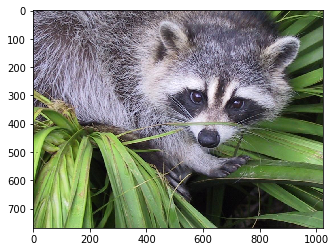

(768, 1024, 3) uint8


In [3]:
import scipy.misc as sm     # até a versão 0.17 do Scipy (removida por questões de licença incompatível)
import pylab as pl
pl.gray()
pl.imshow(sm.face())
pl.show()
print(sm.face().shape, sm.face().dtype)

Se vc quiser usar a imagem da Lena Söderberg, até a versão anterior a 0.17 havia disponível uma função no subpacote **misc** chamada `lena()` pela qual se podia carregar a famosa imagem do rosto/ombro da Lena..., mas por motivos de incompatibilidade de licenças a função teve que ser removida. Mas pode-se salvar a imagem num diretório e carregá-la usando:

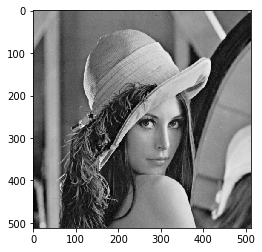

In [10]:
img = pl.imread('dat/lena.dat')
pl.imshow(img)
pl.show()

Algumas outras funções úteis também podem ser encontradas no subpacote **scipy.special**.  
Por exemplo: `factorial()` e `comb()` que calculam o fatorial de `n`, `n!`, e a quantidade de combinações (sem considerar a ordem dos elementos) $C_(n,k)=\left(_k^n\right) = \frac{n!}{k!(n-k)!}$, usando aritmética inteira exata (graças ao objeto inteiro `Long`) ou usando a precisão de ponto flutuante e a função Gama. 

<img src='img/comb.png' width=900>

#### Exemplo-1
Seja o conjunto $Z = {A, B, C, D}$. Quantos grupos podem ser formados agrupandos os elementos de $Z$, 2 a 2, sem levar em consideração a ordem dos elementos (os grupos não podem ter os mesmos elementos).

$$C_{4,2}=\binom{4}{2}=\frac{4!}{2!(4-2)!}=\frac{4.3.2!}{2!2!}=\frac{12}{2}=6\;\rm{grupos}$$ 


In [24]:
from scipy.special import comb, factorial
print("C(4,2) =",comb(4,2).astype(int), "   4! =",factorial(4).astype(int))
print("C(4,2) =%2d    4! =%3d" % (comb(4,2),factorial(4)))

C(4,2) = 6    4! = 24
C(4,2) = 6    4! = 24


#### Exemplo-2
Quantas apostas de seis números da MegaSena podem ser preenchidas (acerto das seis dezenas)?

$$C_{60,6}=\binom{60}{6}=\frac{60!}{6!(60-6)!}=\frac{60.59.58.57.56.55.54!}{6!54!}=50.063.860\;\rm{apostas}$$ 

In [25]:
from scipy.special import comb, factorial
print("C(4,2) =",comb(4,2).astype(int), "   4! =",factorial(4).astype(int))
print("C(4,2) =%2d    4! =%3d" % (comb(4,2),factorial(4)))

C(4,2) = 6    4! = 24
C(4,2) = 6    4! = 24


### Transformada de Fourier - Subpacote _fftpack_

A análise de Fourier é um método usado na decomposição de um sinal periódico numa soma de componentes senoidais, ou na recuperação do sinal a partir dessas componentes. Quando o sinal e sua **Transformada de Fourier** são substituídos por suas versões discretizadas, ela passa a ser chamada de **Transformada Discreta de Fourier (DFT)**.  

A DFT se tornou um dos pilares da computação numérica, em parte devido a um algoritmo muito rápido de cálculo, chamado _Fast Fourier Transform (FFT)_, que já era conhecido por Gauss (1805) e foi trazido à luz, em sua forma atual, por Cooley e Tukey (1965). Para quem a velocidade das rotinas FFT é crítica deve-se considerar a instalação do pacote PyFFTW.

A FFT `X[k]` de comprimento `N`, da sequência de comprimento-`N`, `x[n]` é definida como:

$$X[k]=\sum_{n=0}^{N-1}x[n].e^{-j\,k.n.2\pi/N}$$

E a FFT inversa é definida como:  

$$x[n]=\sum_{k=0}^{N-1}X[k].e^{j\,k.n.2\pi/N}$$

Essas transformações podem ser calculadas por meio das funções `fft()` e `ifft()`, respectivamente.

In [28]:
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])       # sequência no domínio original
X = fft(x)                                     # transformada de Fourier
X

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [29]:
Xinv = ifft(X)
Xinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

O exemplo seguinte exibe a representação da magnitude da FFT correspondente à soma de dois senos nas frequências de 50 e 80 Hz:  
<img src='img/espectro.png' width=400>

## Processamento de Sinais - Subpacote _signal_ 

A caixa de ferramentas de processamento de sinais contém algumas funções de filtragem, um conjunto limitado de ferramentas de projeto de filtros e alguns algoritmos de interpolação B-spline para dados unidimensionais e bidimensionais. Embora os algoritmos B-spline possam tecnicamente ser colocados sob a categoria do subpacote `interpolate`, eles são incluídos aqui porque eles só trabalham com dados igualmente espaçados e fazem uso intenso da teoria de filtragem e do formalismo da função de transferência para fornecer uma transformação B-spline rápida. Todo sinal no SciPy é uma matriz de números reais ou complexos.

<img src='img/lena.png' width=400>

### Filtragem

Filtragem é um nome genérico dado à operação realizada por qualquer sistema que modifica um sinal de entrada de alguma forma. No **Scipy** um sinal pode ser visto como um arranjo (_array_) **Numpy**, vetor ou matriz. 

Existem diferentes tipos de filtros para diferentes tipos de operações e, em geral, eles estão divididos em duas grandes categorias de operação de filtragem: linear e não linear. **Filtros lineares** podem sempre ser reduzidos a uma multiplicação de matrizes Numpy achatadas (todos os elementos da matriz são colocados numa única linha) resultando em outra matriz Numpy achatada. 

In [33]:
# Retorna uma cópia do array colapsado a (reduzido a) uma dimensão --> numpy.ndarray.flatten(order='C')
a = np.array([[1,2], [3,4], [5,6]])
print(a.flatten('C'))                     # construído por linha (default)
print(a.flatten('F'))                     # construído por coluna

[1 2 3 4 5 6]
[1 3 5 2 4 6]


É claro que esta não é a melhor forma para se calcular um filtro, pois as matrizes e vetores envolvidos podem ser enormes.  

Por exemplo: a filtragem de uma imagem 512x512 pixels usando o método descrito, precisaria da multiplicação de uma matriz $512^2x512^2$ por um vetor de $512^2$ elementos. Apenas o armazenamento dessa matriz **Numpy** padrão, necessitaria de 68.719.476.736 elementos (68 bilhões). Usando armazenamento de 4 bytes por elemento (valor numérico real de precisão simples) seriam necessários mais de 256 GB de memória.  Na maioria das aplicações os elementos dessa matriz são nulos e um método diferente para cálculo da saída deve ser empregado.

### Convolução/Correlação 

Muitos filtros lineares também possuem a propriedade de invariância ao deslocamento (da variável independente: tempo, espaço etc.). Isto significa que a operação de filtragem é a mesma em locais diferentes do sinal e implica que a matriz de filtragem pode ser construída a partir do conhecimento de uma linha (ou coluna) da matriz. Neste caso, a multiplicação da matriz pode ser realizada usando as transformadas de Fourier.

Seja $x[n]$ um sinal unidimensional indexado pelo inteiro $n$. A **Convolução** de dois sinais unidimensionais pode ser expressa por:

$$y[n]=\sum_{k=-\infty}^\infty x[k].h[n-k]$$

Esta equação só pode ser implementada diretamente se limitarmos as sequências envolvidas, $x[n]$ e $h[n]$, a sequências de durações finitas, para que possam ser armazenadas na memória de um computador digital. Vamos escolher $n=0$ para ser o ponto inicial de ambas as sequências, e seja $K+1$ o valor para o qual $x[n]=0$ para todo $n\ge K+1$, e $M+1$ seja o valor para o qual $h[n]=0$ para todo $n \ge M+1$, então a expressão de convolução discreta será:

$$y[n]=\sum_{k=max⁡(n-M,0)}^{min⁡(n,K)} x[k].h[n-k]$$

A convolução discreta de duas sequências finitas de comprimentos $K+1$ e $M+1$, respectivamente, resulta numa sequência finita de comprimento $K+M+1 = (K+1)+(M+1)-1$. 

A convolução unidimensional é implementada no **SciPy** com a função `convolve()`. Esta função tem como entradas os sinais `x[n]`, `h[n]`, e dois _flags_ opcionais `mode` e `method`, e retorna o sinal `y[n]`. 

O _flag_ `mode` (opcional) permite especificar qual parte do sinal de saída será retornada. O valor padrão `full` retorna o resultado cheio, ou seja, todos os valores calculados na convolução (inclusive os nulos). Se o _flag_ for `same`, somente os $K$ valores centrais serão retornados, começando em $y[⌊(M-1)/2⌋]$, de modo que a saída tenha o mesmo comprimento do primeiro sinal das entradas. Se o _flag_ for `valid` então somente os `K-M+1` valores de saída são retornados.

O segundo _flag_ `method`, opcional, determina como a convolução é calculada, seja através da abordagem da transformada de Fourier com `fftconvolve()` ou através do método direto (somatório da definição). Normalmente é selecionado o método esperado mais rápido. O método da transformada de Fourier tem ordem de grandeza $O(N.log⁡N)$, enquanto o método direto tem ordem de grandeza $O(N^2)$. Dependendo da constante $O$ e do valor de $N$, um desses métodos pode ser mais rápido que o outro. O valor padrão `auto` executa um cálculo aproximado e escolhe o método esperado mais rápido, enquanto os valores `direct` e `fft` forçam a computação com os outros dois métodos. O código abaixo mostra um exemplo simples de convolução de duas sequências:


In [35]:
from scipy import signal
x = np.array([1.0, 2.0, 3.0])
h = np.array([0.0, 1.0, 0.0, 0.0, 0.0])
print(signal.convolve(x, h))
print(signal.convolve(x, h, 'same'))

[0. 1. 2. 3. 0. 0. 0.]
[2. 3. 0.]


#### Cálculo da Convolução pelo Método da Tabela (manual)
<img src='img/metodo_tabela.png' width=600>

Essa mesma função `convolve()` pode usar matrizes N-dimensionais como entradas e retornar a convolução N-dimensional entre as duas matrizes, conforme mostrado no exemplo seguinte. Os mesmos _flags_ de entrada também estão disponíveis para esse caso.

In [36]:
x = np.array([[1.,1.,0.,0.],[1.,1.,0.,0.],[0.,0.,0.,0.],[0.,0.,0.,0.]])
h = np.array([[1.,0.,0.,0.],[0.,0.,0.,0.],[0.,0.,1.,0.],[0.,0.,0.,0.]])
signal.convolve(x, h)

array([[1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

A **correlação** é uma operação muito semelhante à convolução em termos de equação, troca-se apenas o sinal de menos por um mais. Portanto, a correlação cruzada dos sinais `x[n]` e `y[n]`, é dada por:

$$w[n]=\sum_{k=-\infty}^\infty y[k].x[n+k]$$

Para sinais de comprimento finito com $y[n]=0$ fora do intervalo $[0,K]$, e $x[n]=0$ fora do intervalo $[0,M]$, o somatório seria:

$$w[n]=\sum_{k=máx⁡(n-M,0)}^{mín⁡(n,K)} y[k].x[n+k]$$,

A função `scipy.correlate()` implementa a correlação. _Flags_ equivalentes aos da função `convolve()` estão disponíveis para esta operação, retornando uma sequência completa de comprimento $K+M+1$ (`full`), ou uma sequência com o mesmo tamanho da maior sequência iniciando em $w[-K+⌊M-1⌋⁄2]$ (`same`) ou uma sequência onde os valores dependem de todos os valores da menor sequência (`valid`). Esta opção final retorna os $K − M + 1$ valores da sequência $w[M-K]$ até $w[0]$, inclusive.

Quando $N=2$, correlação ou convolução, pode ser usado para construir filtros de imagem arbitrários para executar ações como desfoque, melhoramento e detecção de borda para uma imagem.

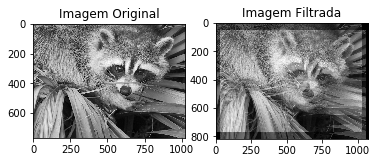

In [41]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

guaxinim = misc.face(gray=True)
filtro = np.zeros((50, 50))
filtro[0][0] = 1.0
filtro[49][25] = 1.0
guaxfilt = signal.fftconvolve(guaxinim, filtro)

plt.subplot(121); plt.imshow(guaxinim); plt.gray(); plt.title('Imagem Original')
plt.subplot(122); plt.imshow(guaxfilt); plt.gray(); plt.title('Imagem Filtrada')
plt.show()

O cálculo da convolução no domínio do tempo, como acima, é usado principalmente para filtrar sinais quando um deles é muito menor do que o outro ($K≫M$), caso contrário, a filtragem linear é calculada com mais eficiência no domínio de frequência, usando a função `fftconvolve()`. Por padrão, `convolve()` estima o método mais rápido usando `choose_conv_method()`. 

Se a matriz `filtro[n,m]` puder ser fatorada de acordo com:  $h[n,m]=h_1[n].h_2[m]$, a convolução então pode ser calculada por meio da função `sepfir2d()`. 

**Exemplo**: 	

Seja um filtro gaussiano $h[n,m]∝e^{x^2-y^2}=e^{x^2}.e^{y^2}, o qual é frequentemente usado para borrar imagens.

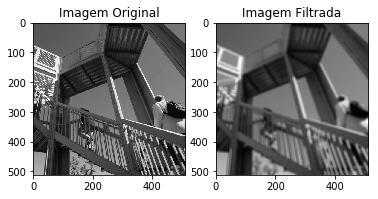

In [42]:
imagem = misc.ascent()
filtro = signal.gaussian(10, 10.0)
imgnova = signal.sepfir2d(imagem, filtro, filtro)
plt.subplot(121); plt.imshow(imagem); plt.gray(); plt.title('Imagem Original')
plt.subplot(122); plt.imshow(imgnova); plt.gray(); plt.title('Imagem Filtrada')
plt.show()


Volta ao [índice...](http:/notebooks/index.ipynb)